# 曼德博罗集

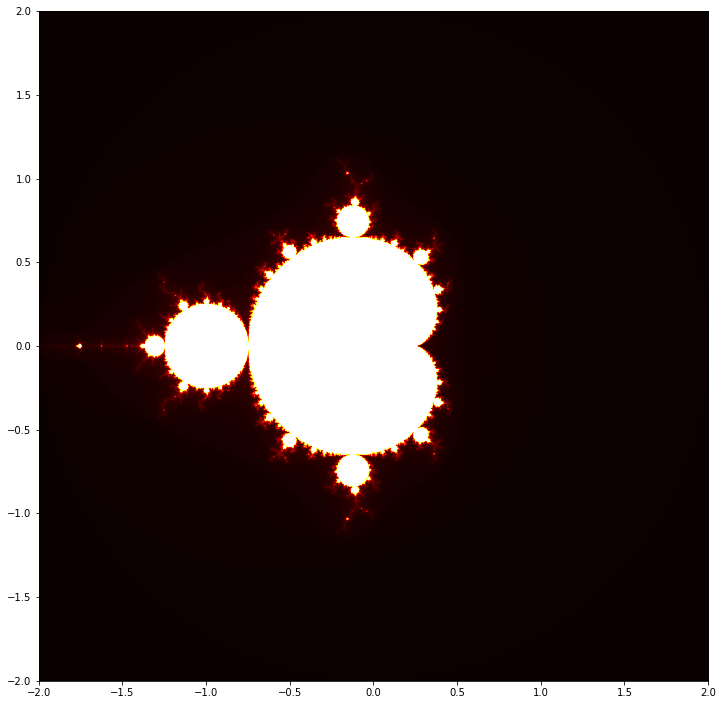

In [17]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda z, c: z**2+c

def steps(c, max_it=200):
    z = 0
    counter = 0
    while abs(z)<2 and counter<max_it:
        counter += 1
        z = f(z,c)
    return counter

def display(x_num=2000, y_num=2000):
    x_ax = np.linspace(-2, 2, x_num)
    y_ax = np.linspace(-2, 2, y_num)
    X,Y = np.meshgrid(x_ax,y_ax)
    c = X + 1j * Y    
    result = np.array([[steps(c[i, j]) for j in range(x_num)] for i in range(y_num)])#i,j 的顺序为什么不能互换？
    plt.figure(figsize=(12,16))
    plt.imshow(result, interpolation='bilinear', cmap=plt.cm.hot,
              vmax = abs(result).max(), vmin = abs(result).min(),
              extent = [-2, 2, -2, 2])
    plt.show()    
    
if __name__ == '__main__':
    display(1000, 1000)

# Life game 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import *
import os
os.chdir(r'D:\00.Software\python demo\分形与混沌')

def rule(X):
    #X 用来判断
    X1 = np.zeros(shape=np.shape(X))
    for i in range(1, np.shape(X)[0]-1):
        for j in range(1, np.shape(X)[1]-1):
            counter_alive = 0
            for dx, dy in neighbour:
                if X[i+dx, j+dy] == Alive:
                    counter_alive += 1
            if X[i, j] == Alive:
                if counter_alive < 2 or counter_alive >3:
                    X1[i, j] = Dead
                elif counter_alive == 2 or counter_alive == 3:
                    X1[i, j] = Alive
            elif X[i, j] == Dead :
                if counter_alive == 3:
                    X1[i, j] = Alive   
    return X1


def iteration(X):
    counter_it = 0     
    while counter_it < 10:
        counter_it += 1        
        X = rule(X)  
        plt.figure(figsize=(12, 16))        
        plt.imshow(X)
        cb = plt.colorbar()      
        cb.ax.tick_params(labelsize=17)
        plt.xticks(np.arange(np.shape(X)[1]),fontsize=20)
        plt.yticks(np.arange(np.shape(X)[0]),fontsize=20)
        plt.title(str(counter_it),fontsize=20)
        plt.grid()
        plt.savefig('%02d .png'%counter_it)
    
    
if __name__ == '__main__':
    neighbour = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    Alive = 1
    Dead = 0
    X = np.zeros((10, 10))
    X[[5,5,6,6,7,7,8,8], [5,6,5,6,4,3,4,3]] = Alive
    plt.figure(figsize=(6, 8))
    plt.imshow(X)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=17)
    plt.xticks(np.arange(np.shape(X)[1]), fontsize=20)
    plt.yticks(np.arange(np.shape(X)[0]), fontsize=20)
    plt.grid()
    plt.title('initial', fontsize=20)
    plt.savefig('00.png')
    iteration(X)
    

# Cellular Automaton (Forest fire)

D:\07.conda\envs\keras3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
D:\07.conda\envs\keras3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
D:\07.conda\envs\keras3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

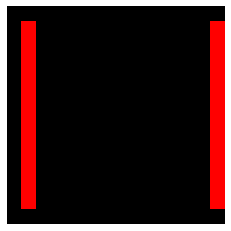

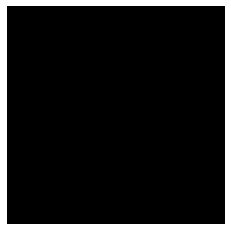

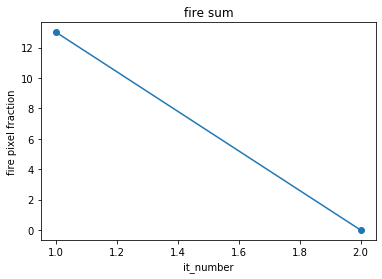

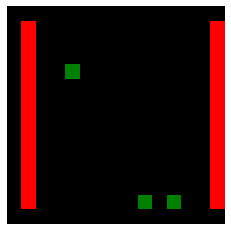

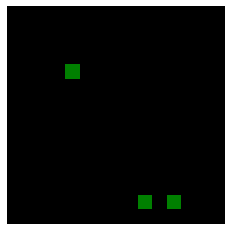

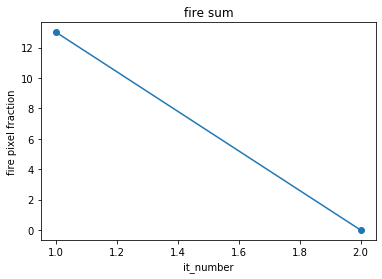

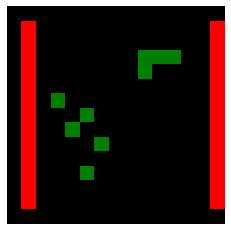

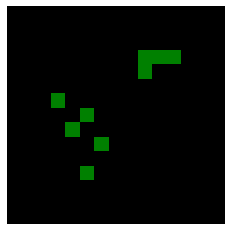

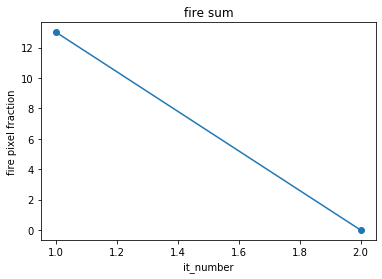

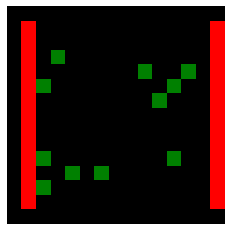

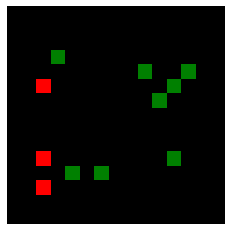

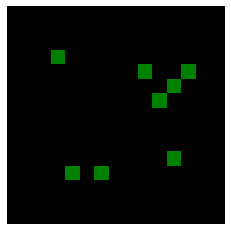

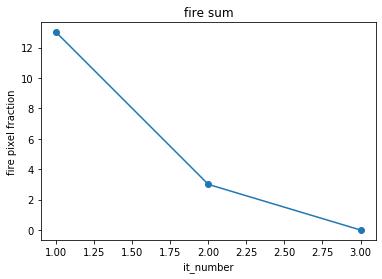

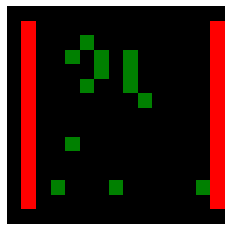

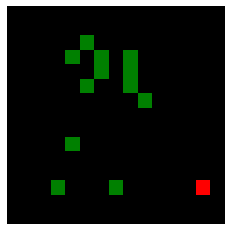

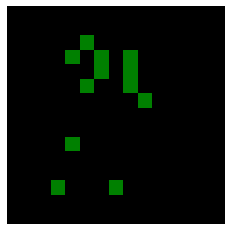

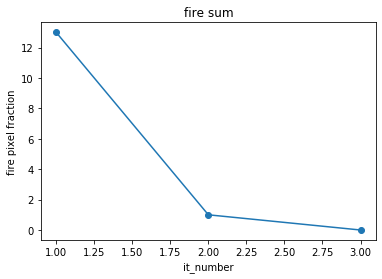

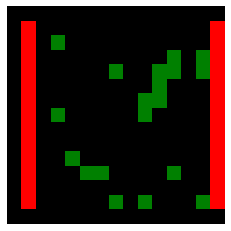

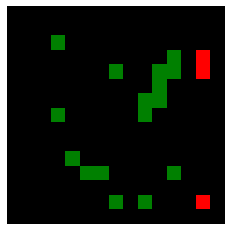

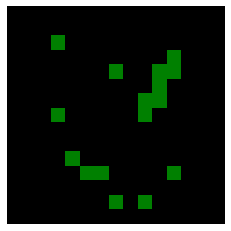

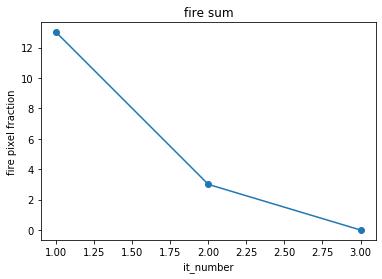

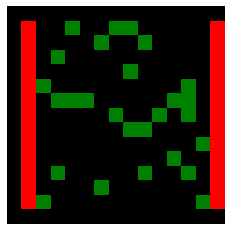

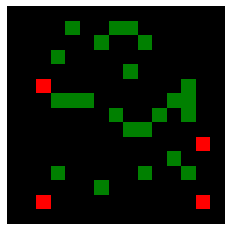

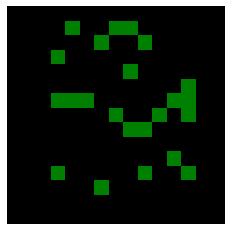

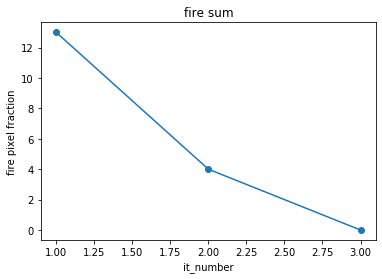

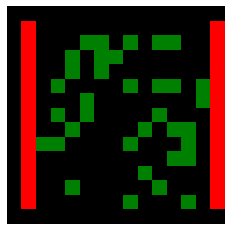

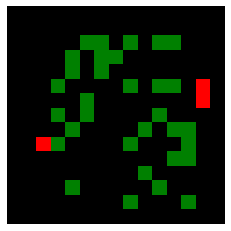

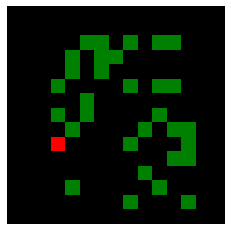

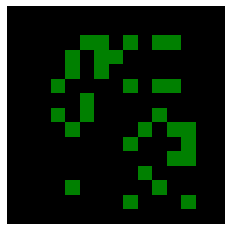

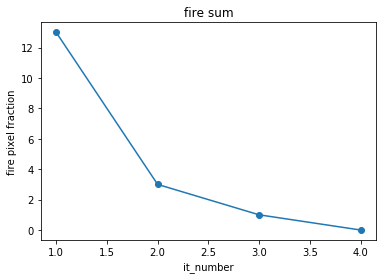

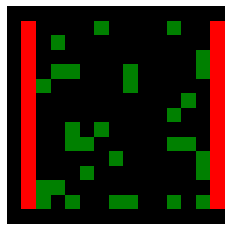

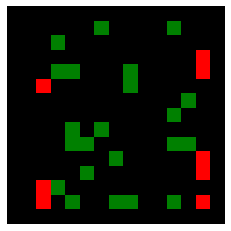

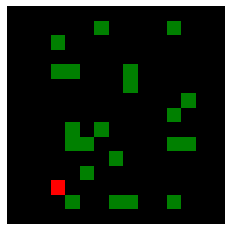

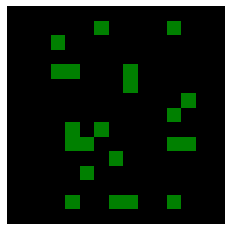

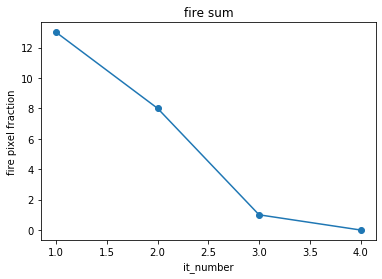

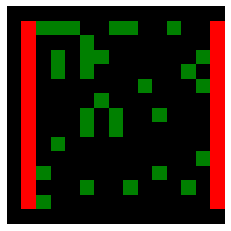

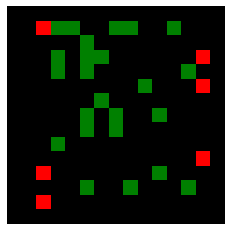

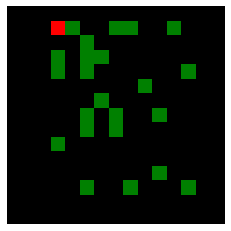

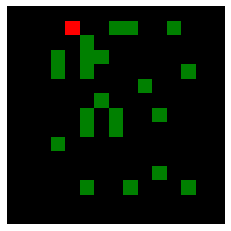

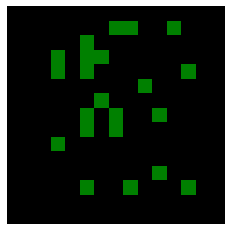

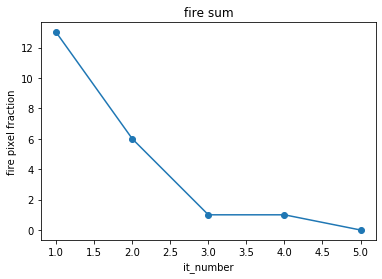

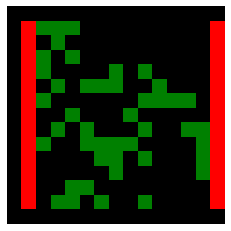

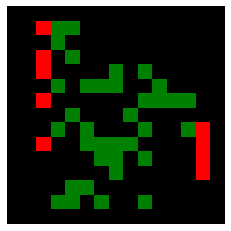

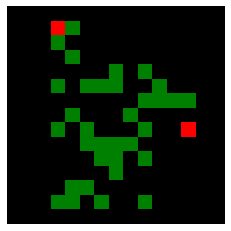

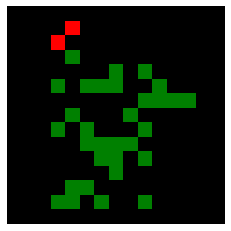

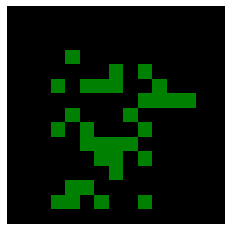

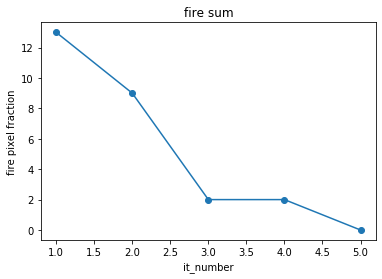

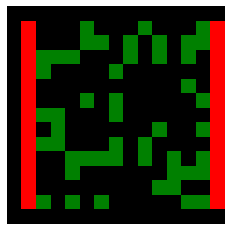

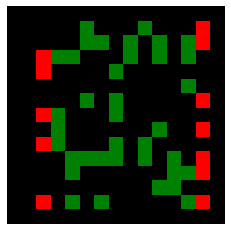

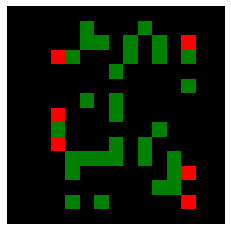

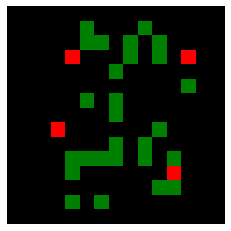

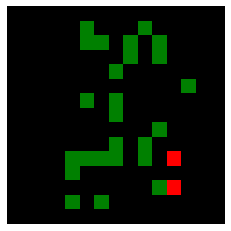

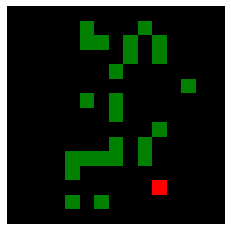

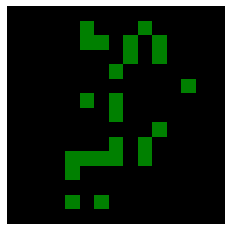

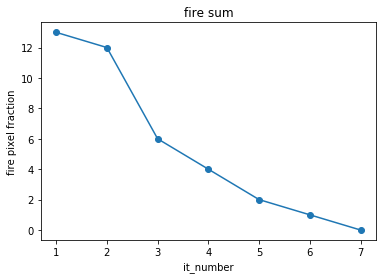

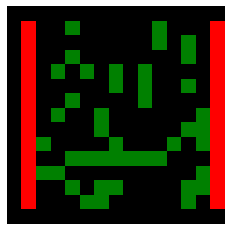

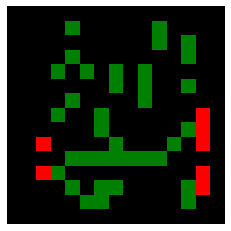

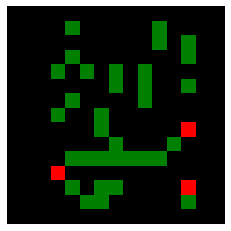

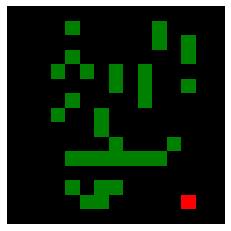

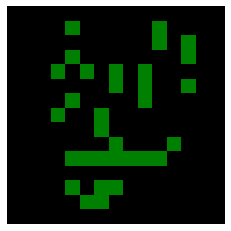

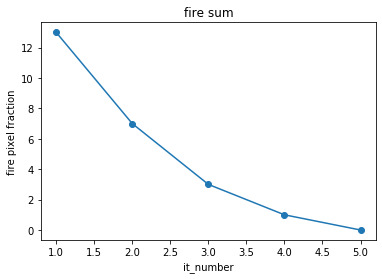

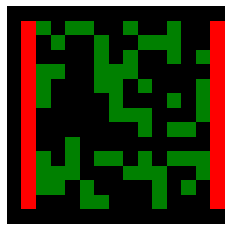

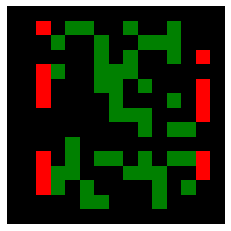

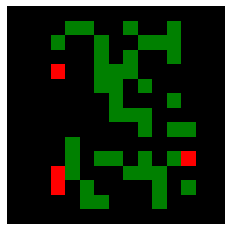

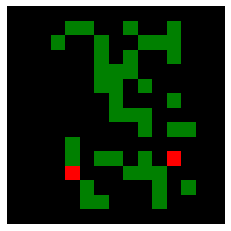

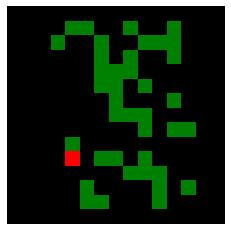

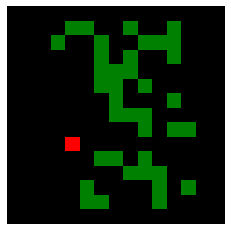

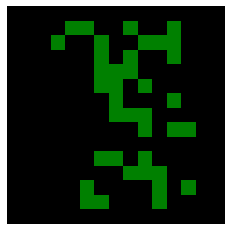

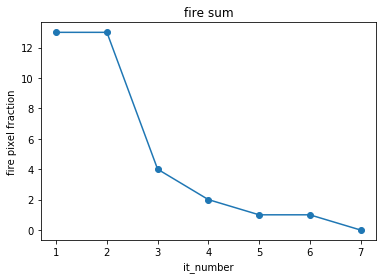

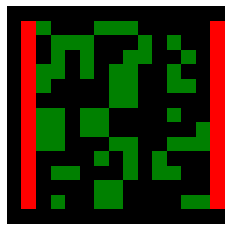

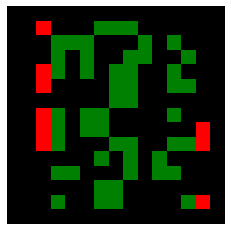

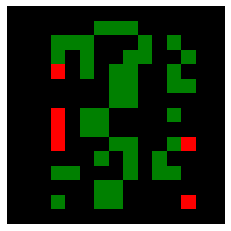

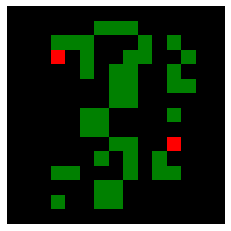

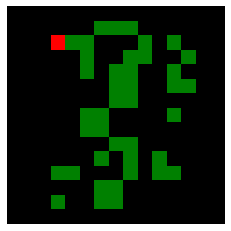

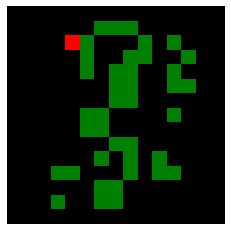

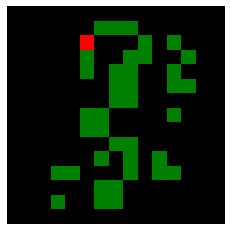

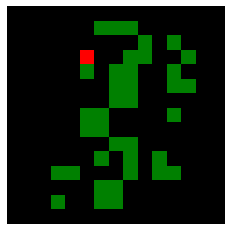

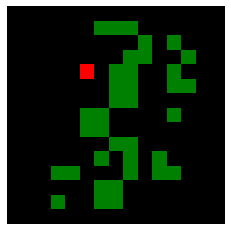

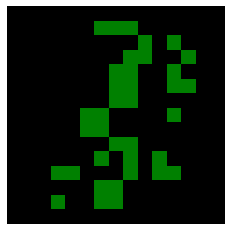

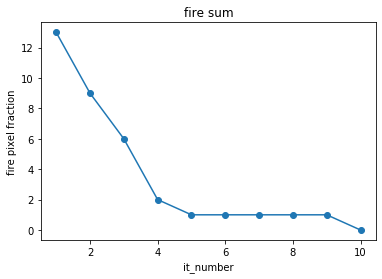

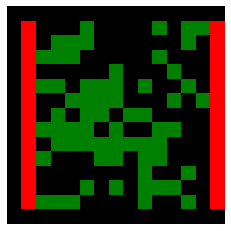

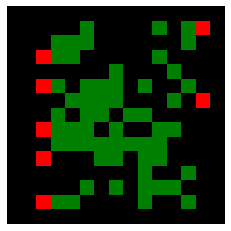

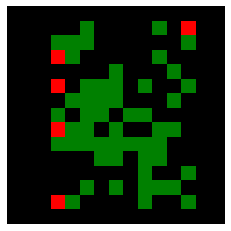

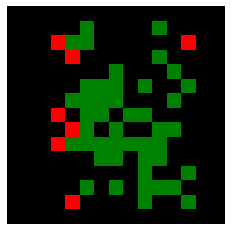

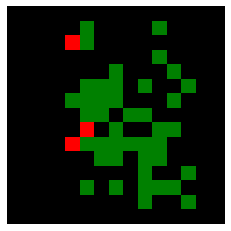

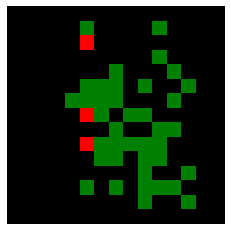

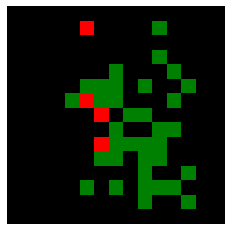

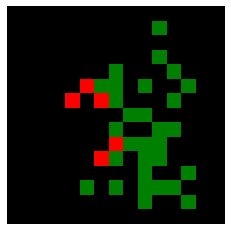

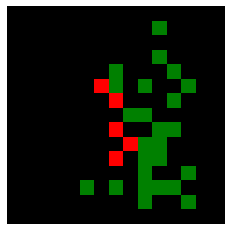

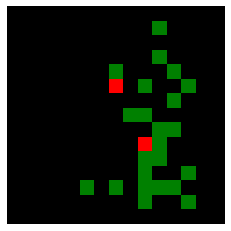

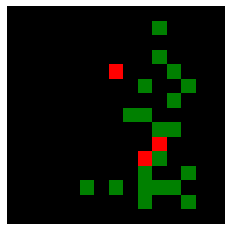

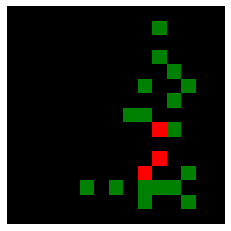

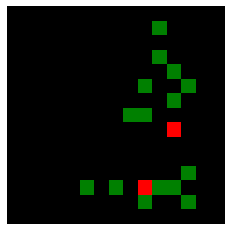

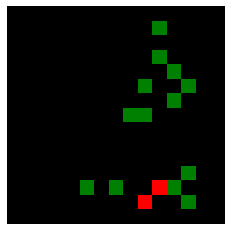

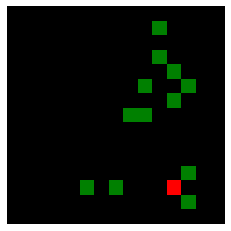

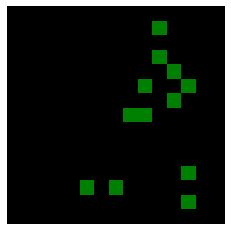

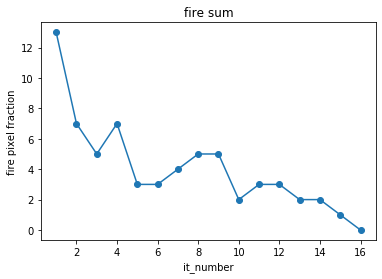

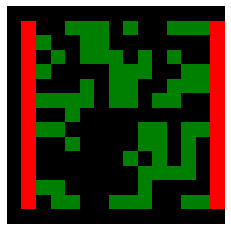

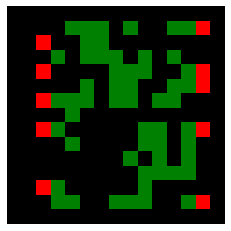

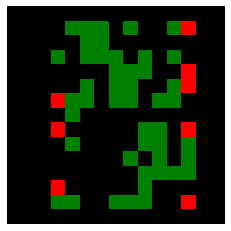

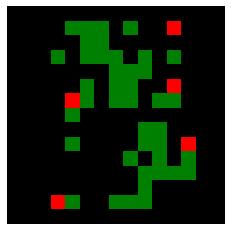

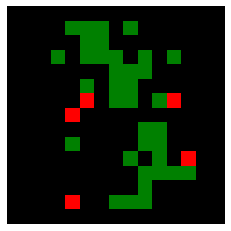

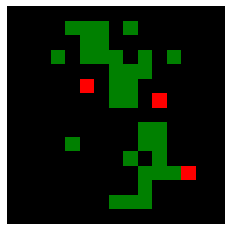

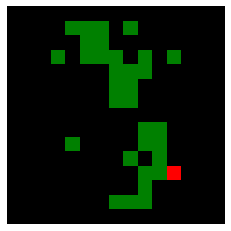

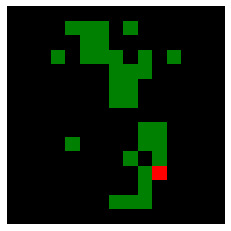

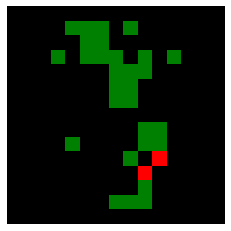

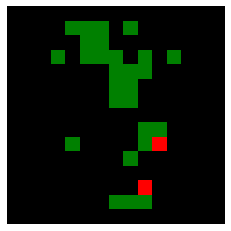

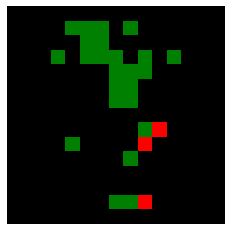

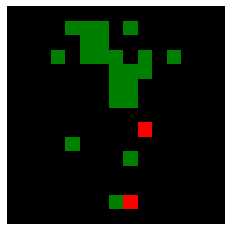

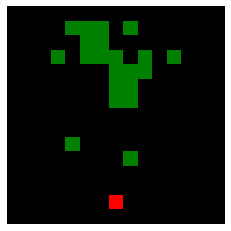

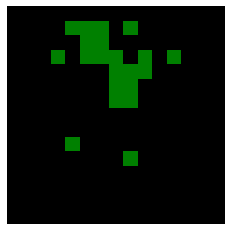

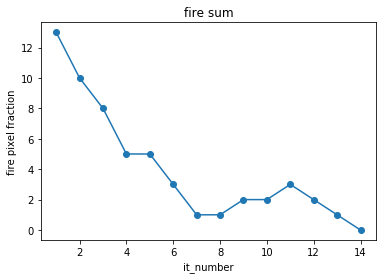

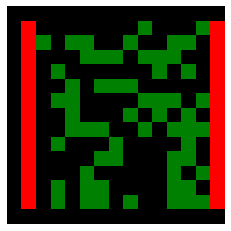

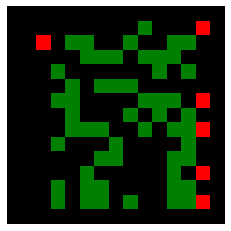

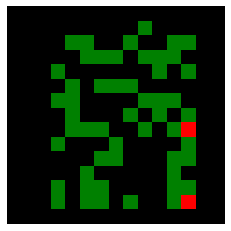

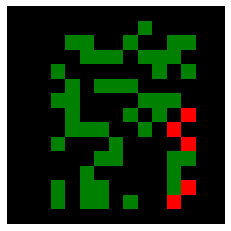

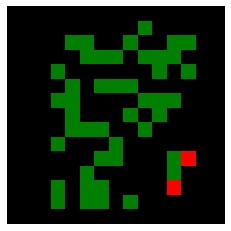

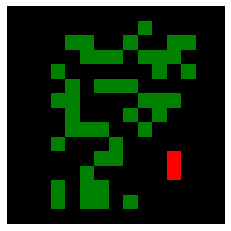

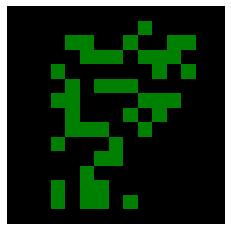

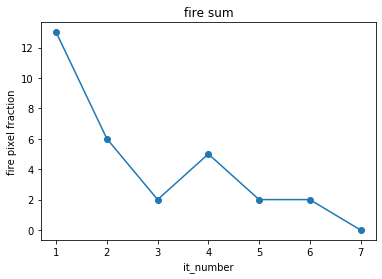

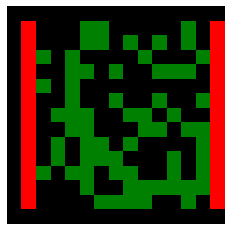

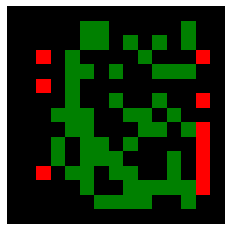

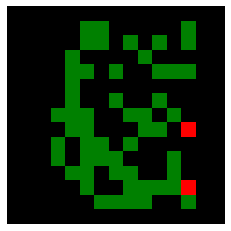

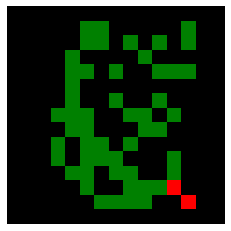

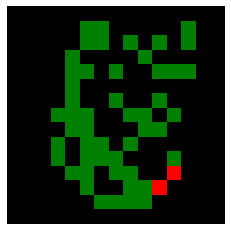

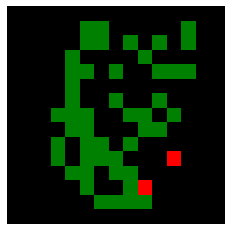

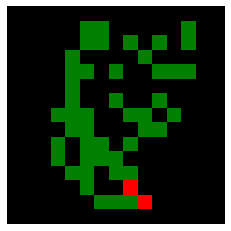

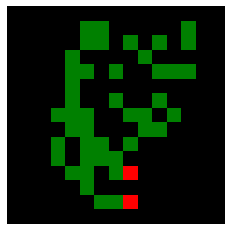

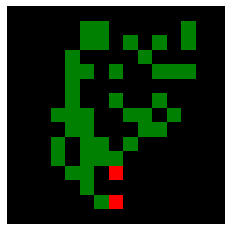

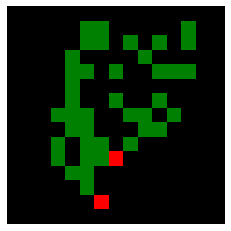

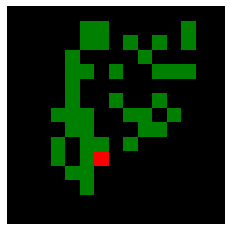

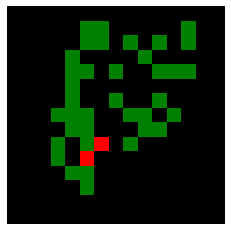

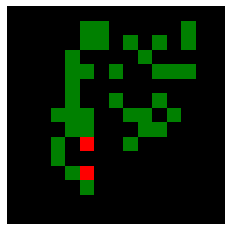

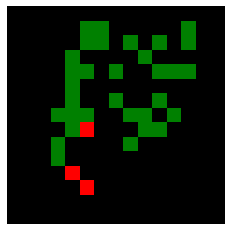

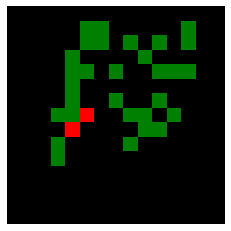

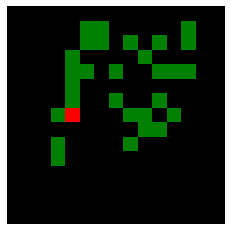

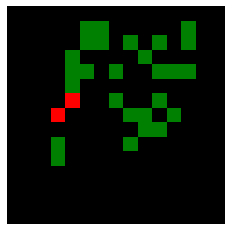

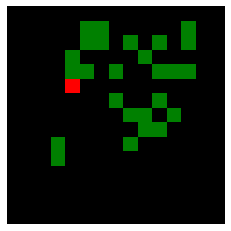

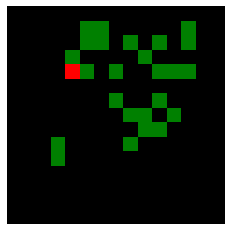

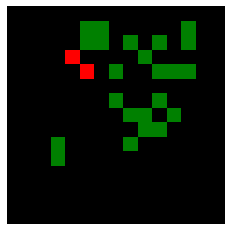

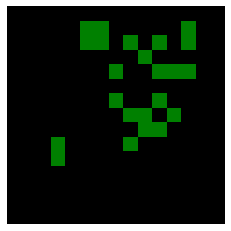

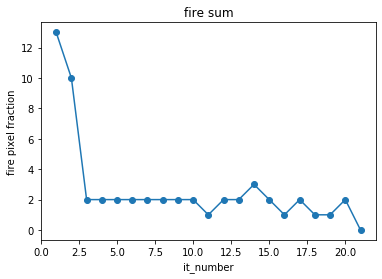

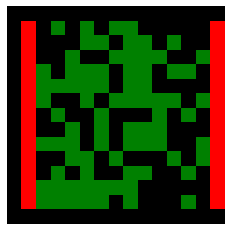

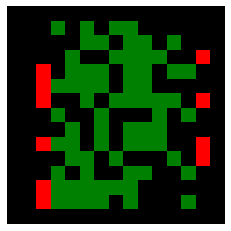

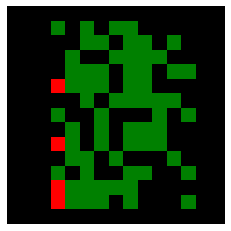

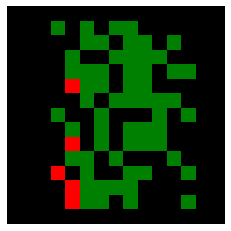

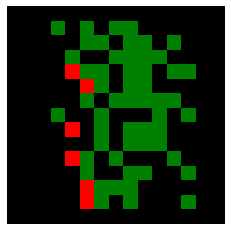

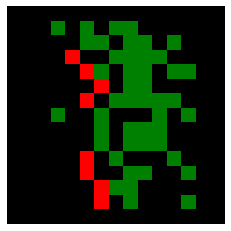

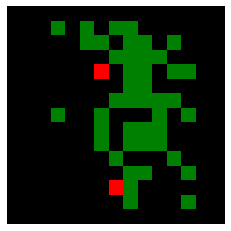

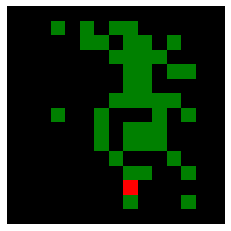

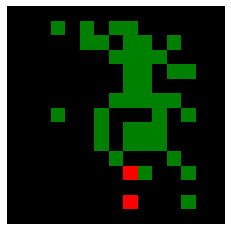

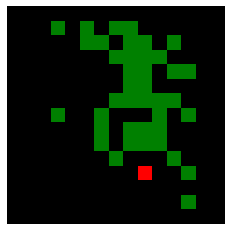

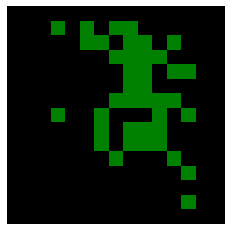

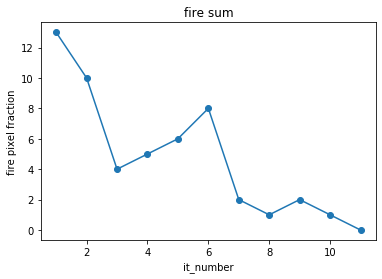

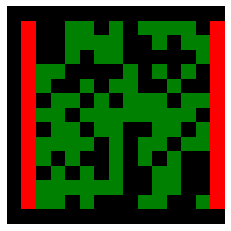

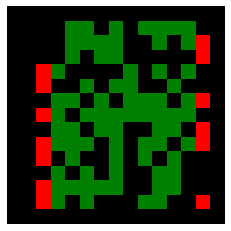

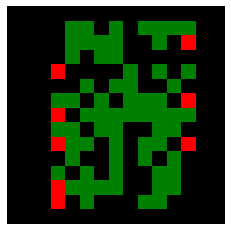

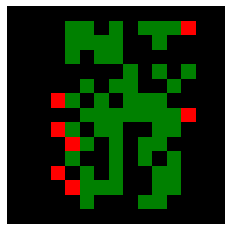

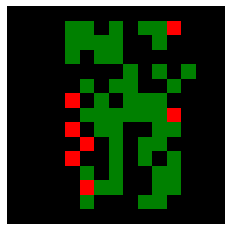

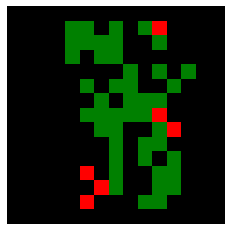

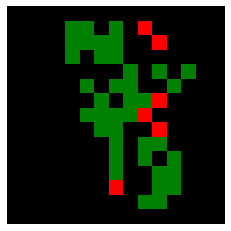

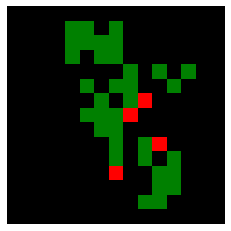

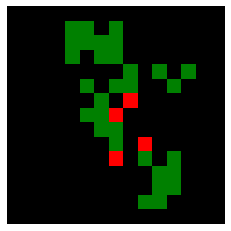

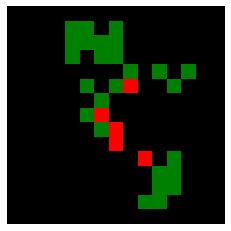

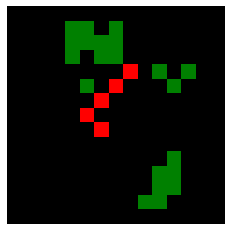

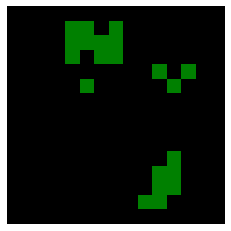

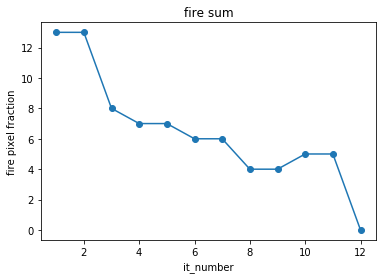

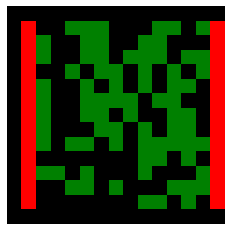

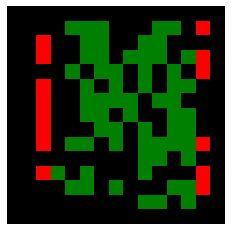

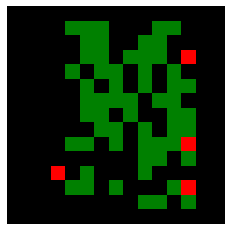

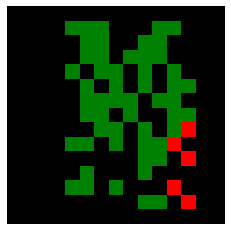

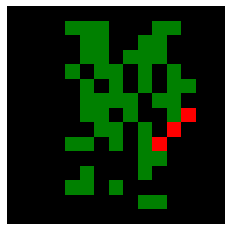

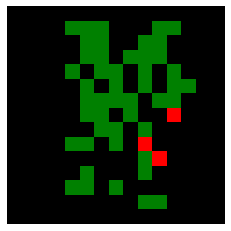

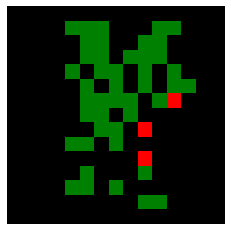

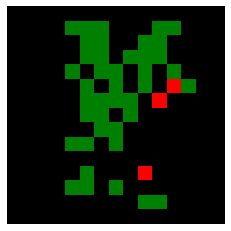

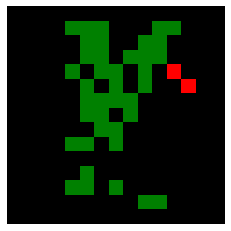

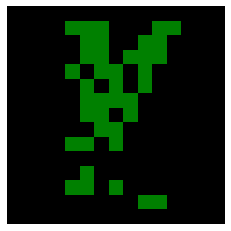

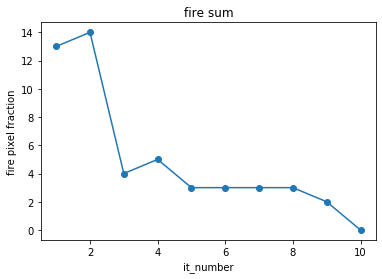

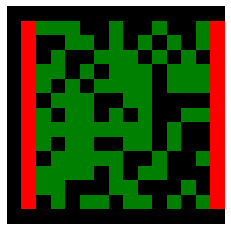

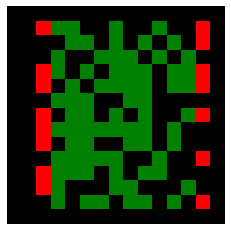

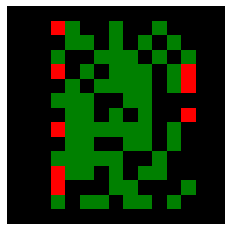

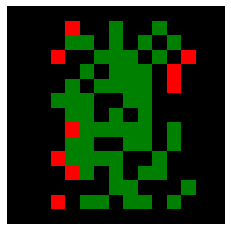

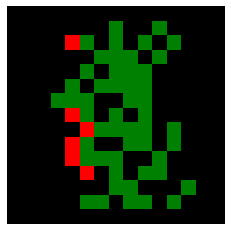

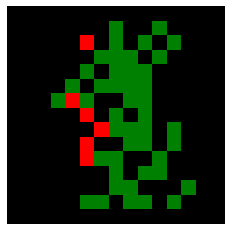

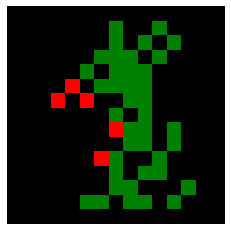

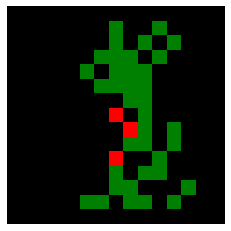

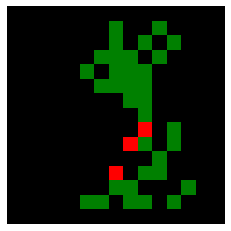

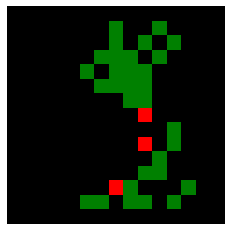

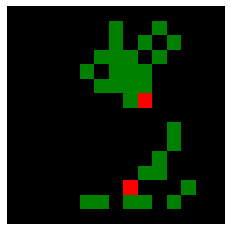

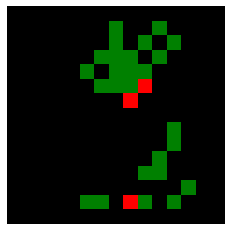

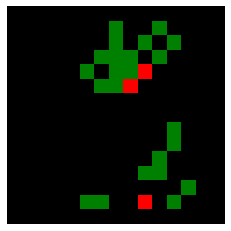

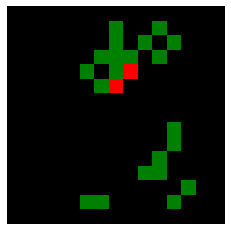

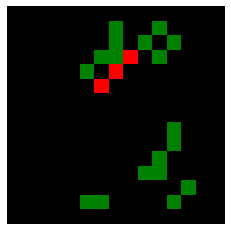

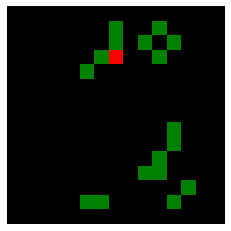

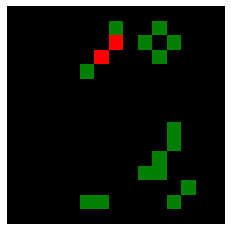

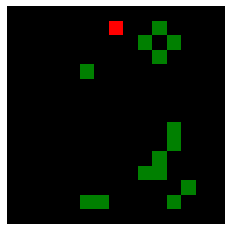

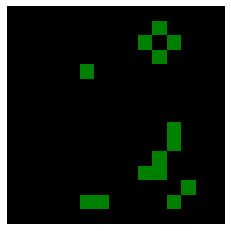

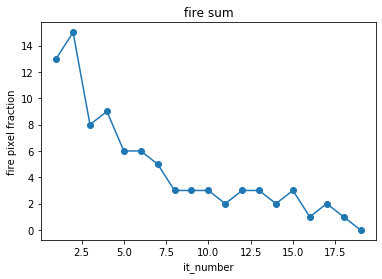

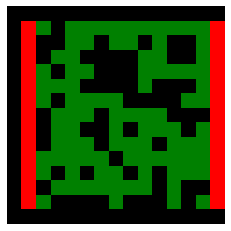

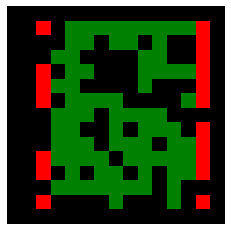

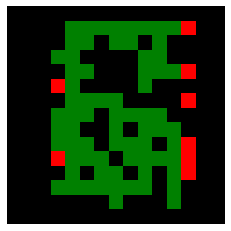

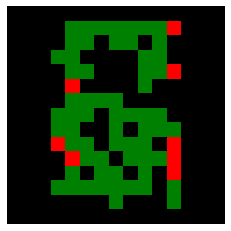

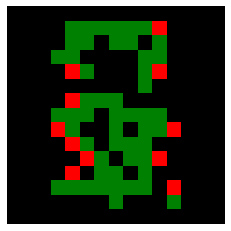

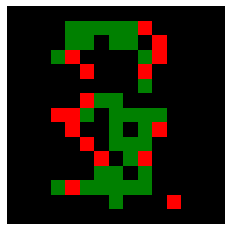

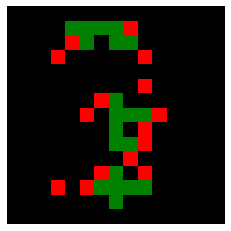

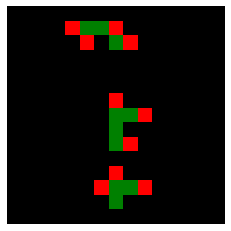

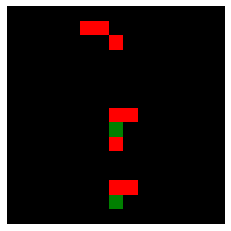

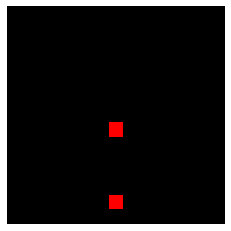

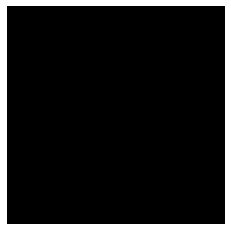

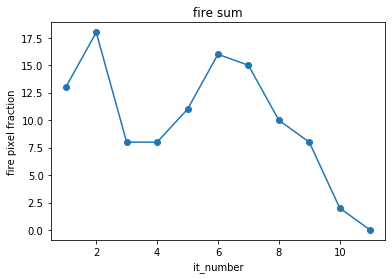

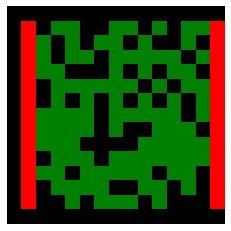

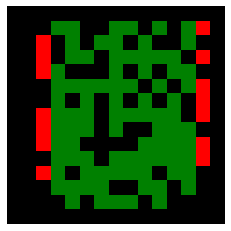

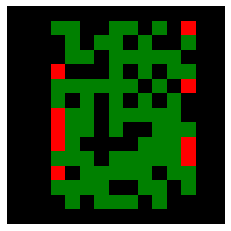

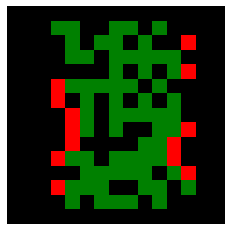

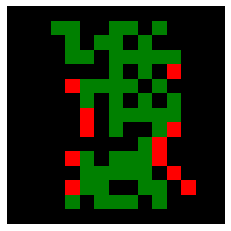

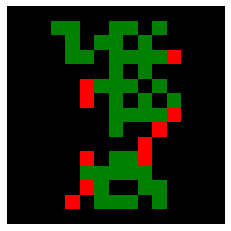

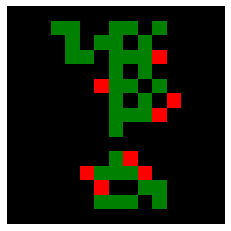

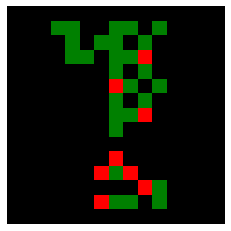

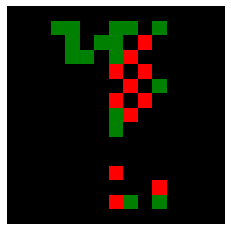

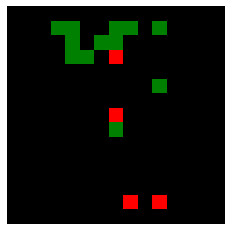

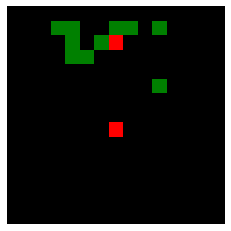

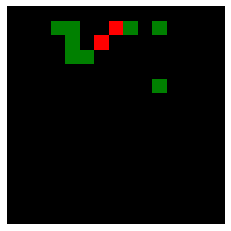

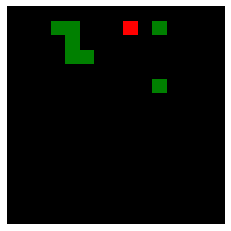

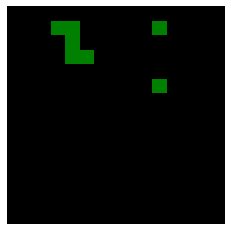

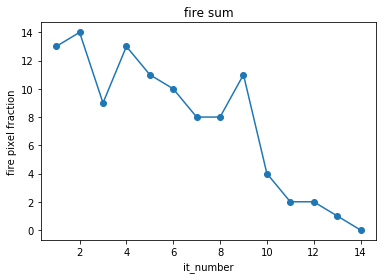

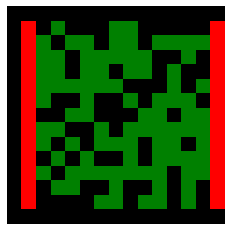

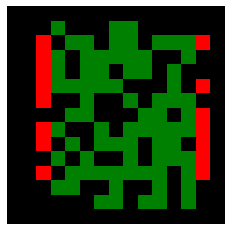

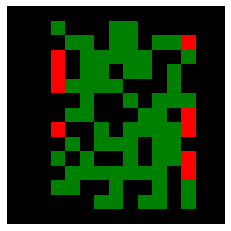

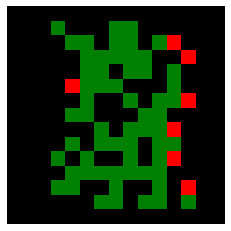

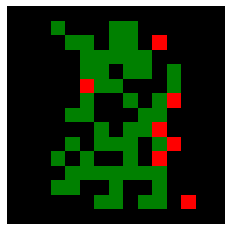

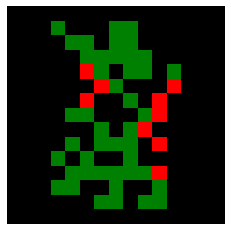

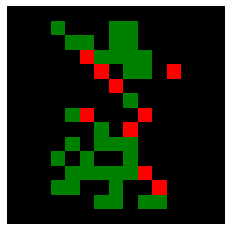

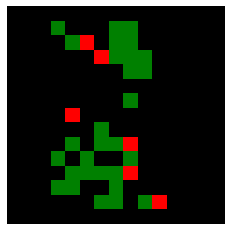

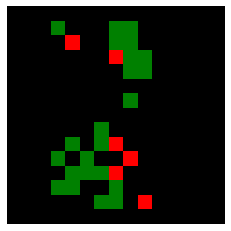

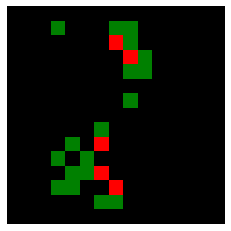

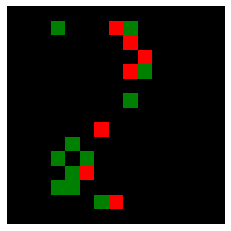

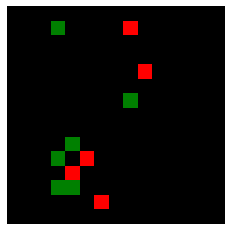

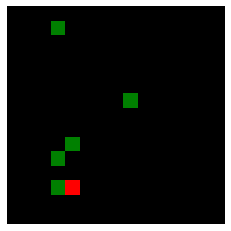

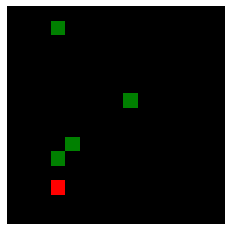

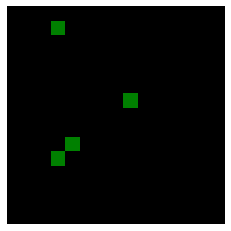

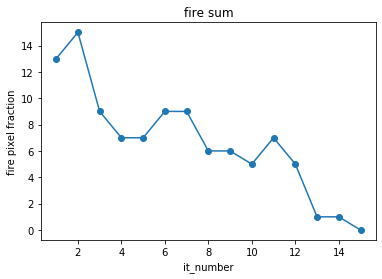

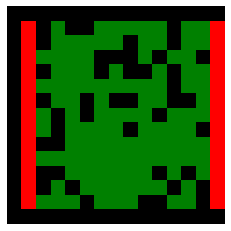

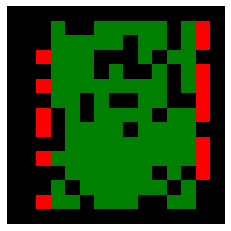

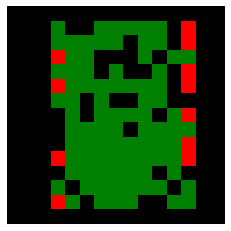

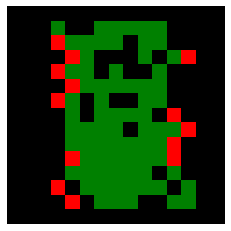

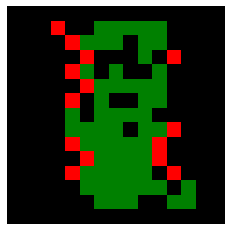

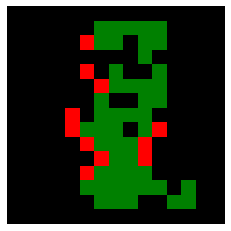

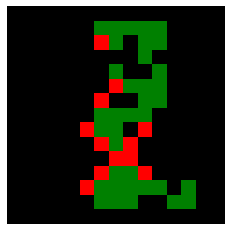

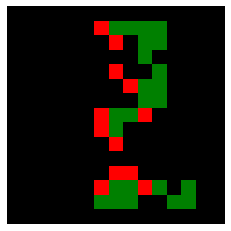

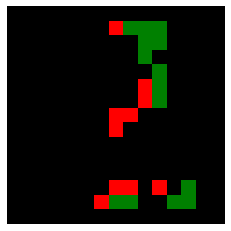

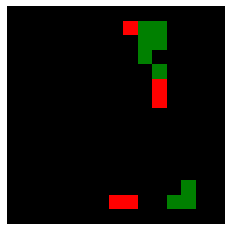

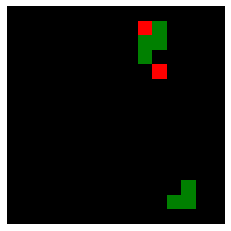

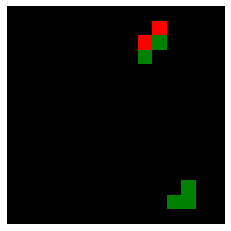

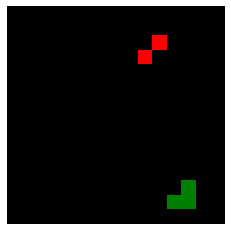

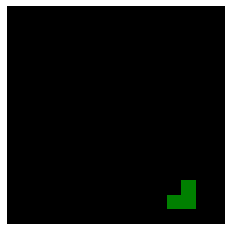

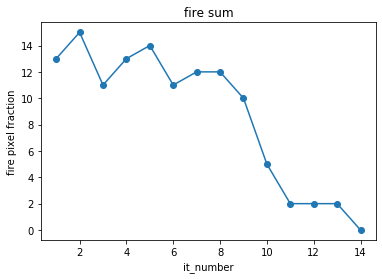

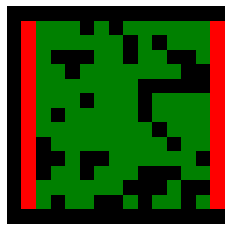

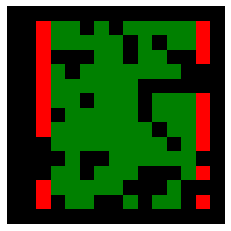

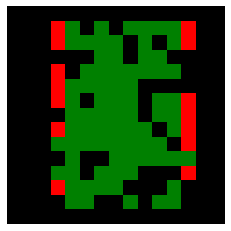

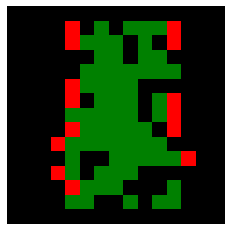

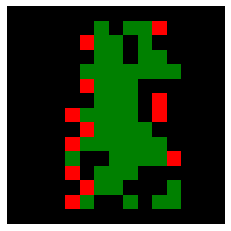

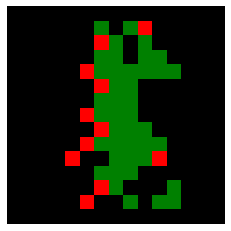

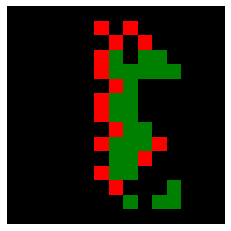

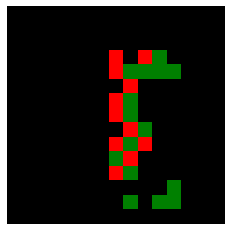

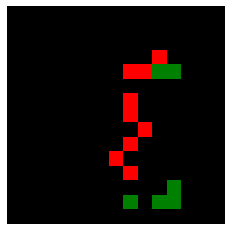

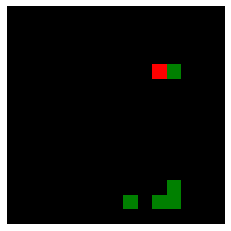

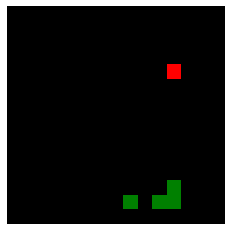

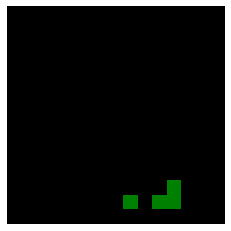

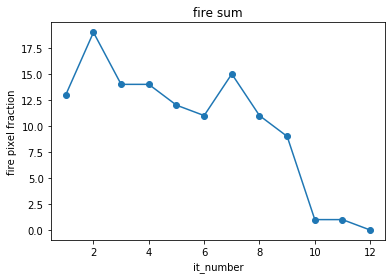

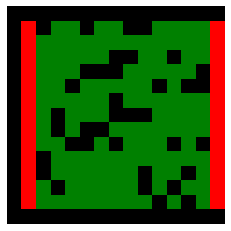

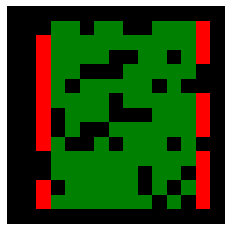

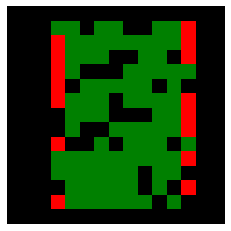

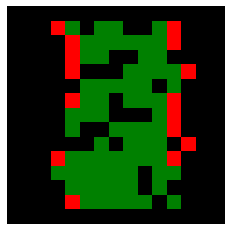

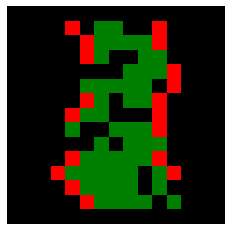

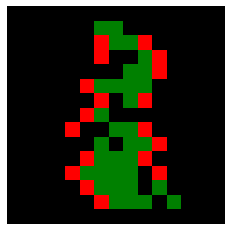

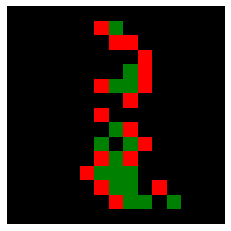

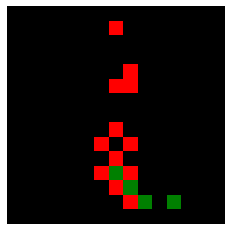

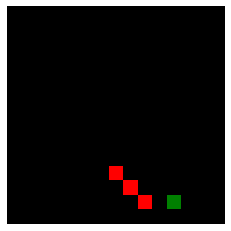

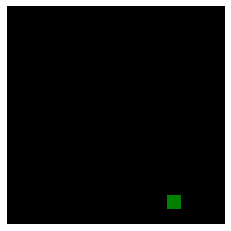

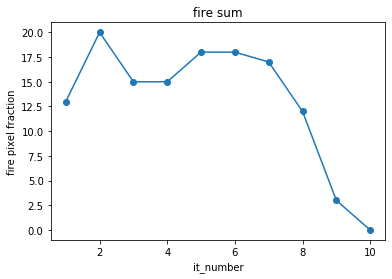

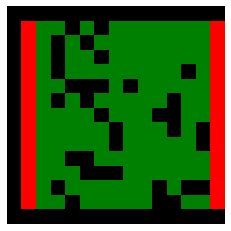

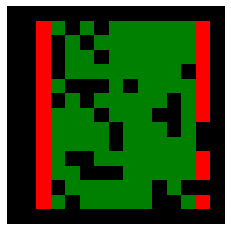

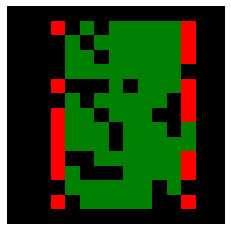

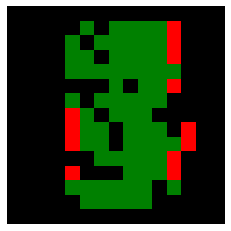

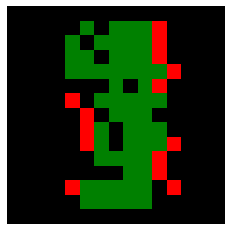

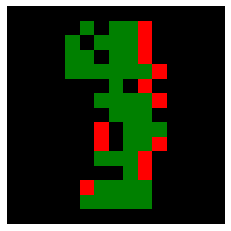

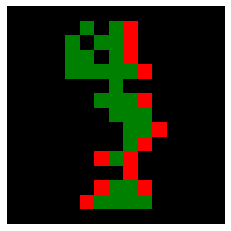

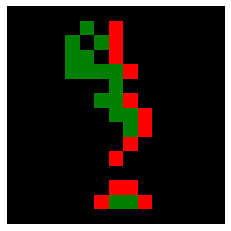

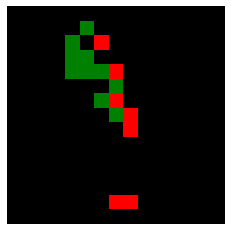

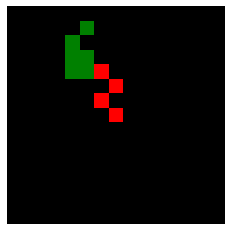

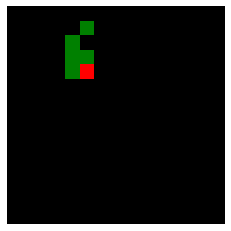

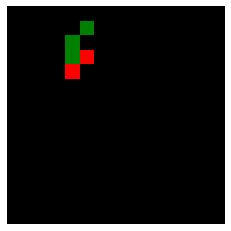

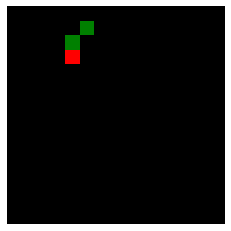

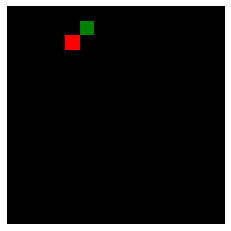

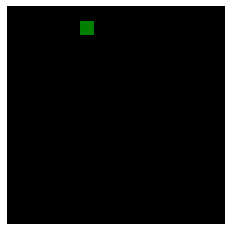

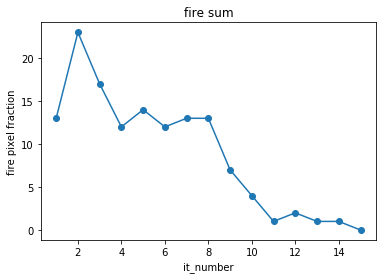

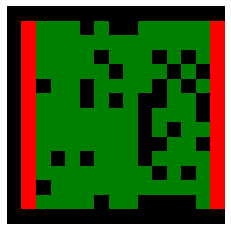

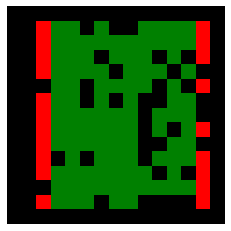

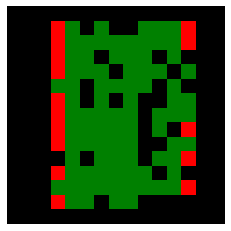

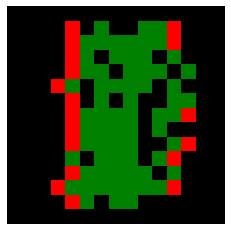

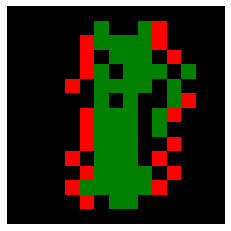

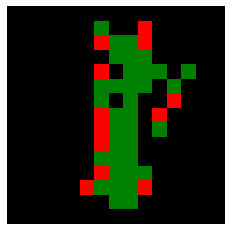

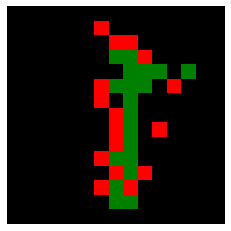

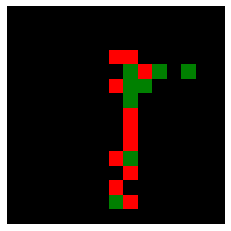

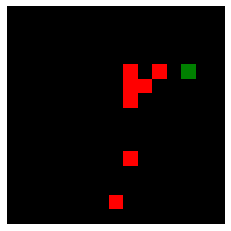

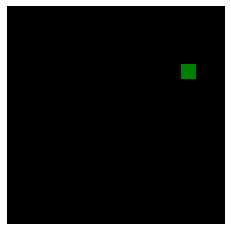

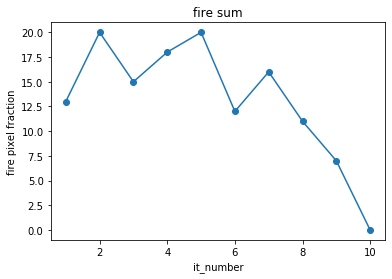

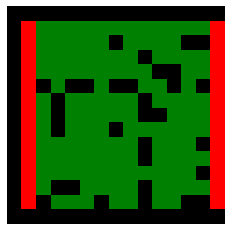

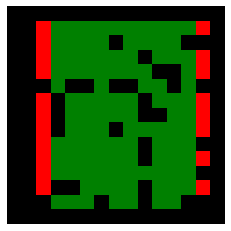

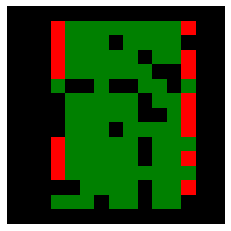

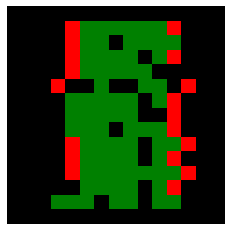

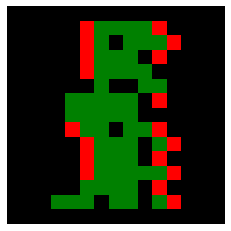

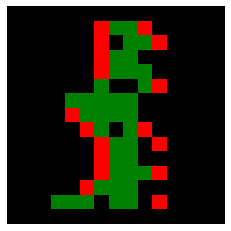

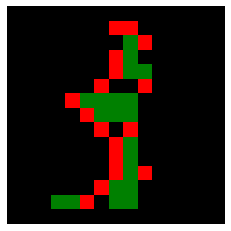

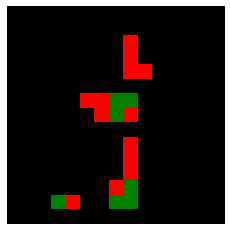

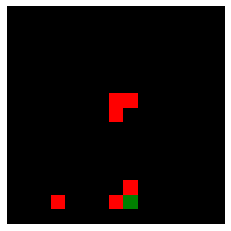

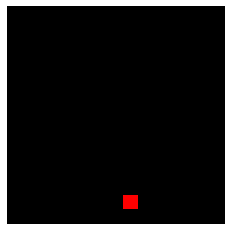

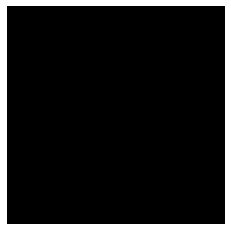

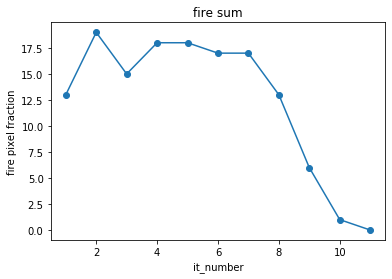

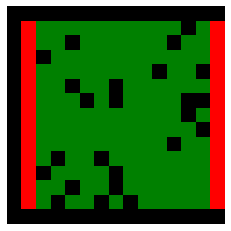

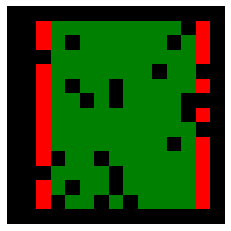

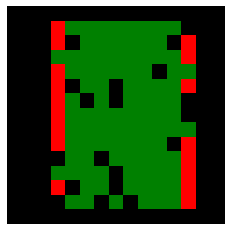

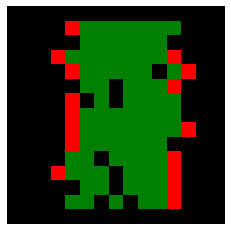

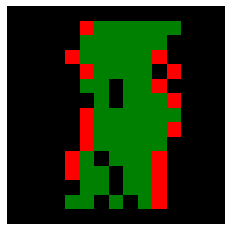

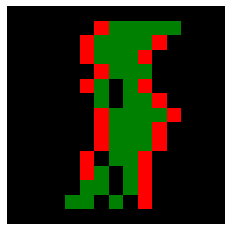

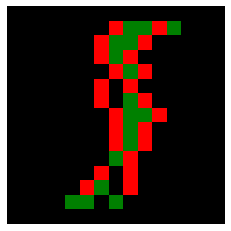

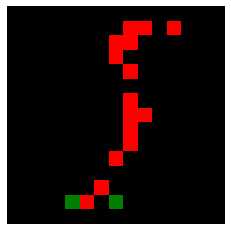

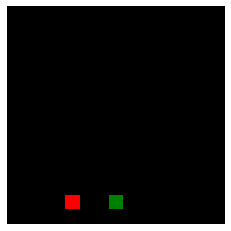

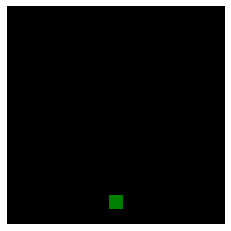

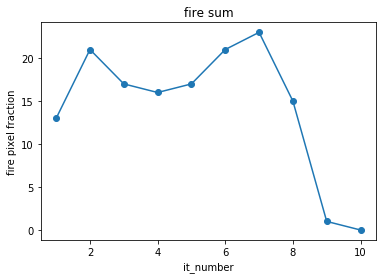

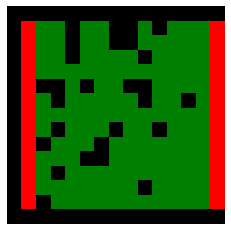

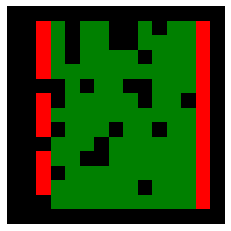

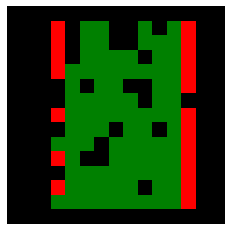

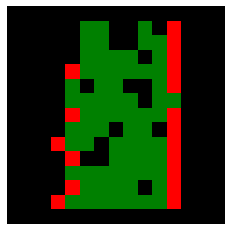

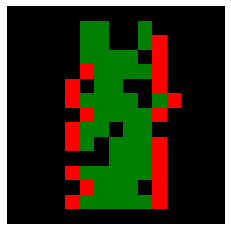

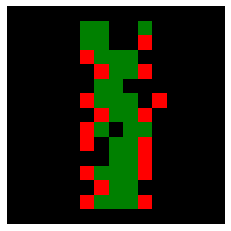

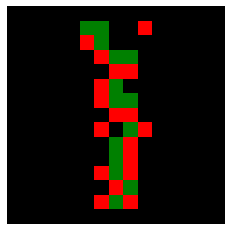

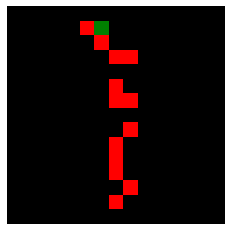

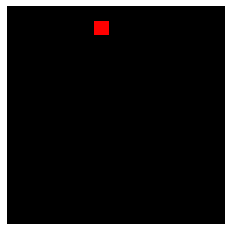

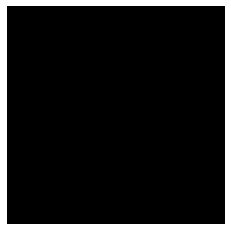

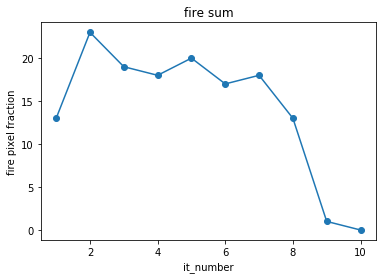

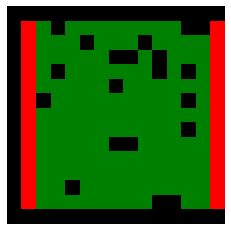

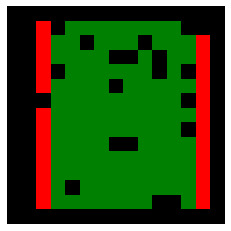

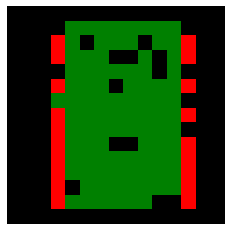

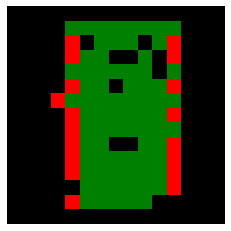

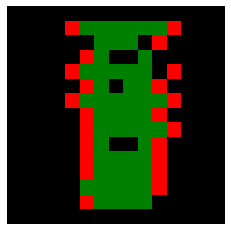

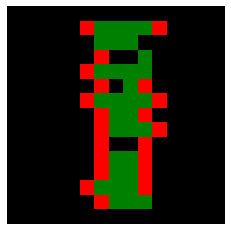

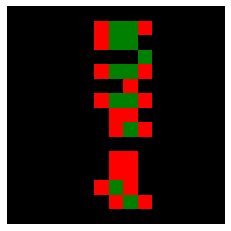

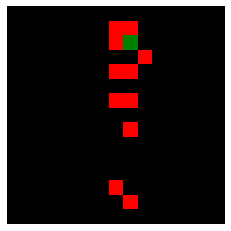

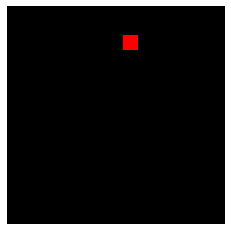

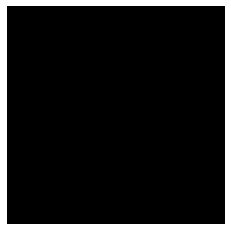

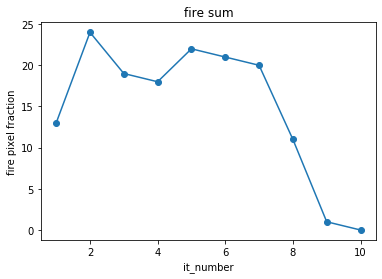

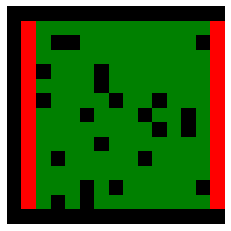

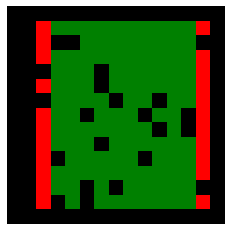

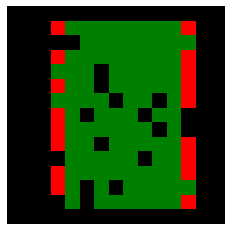

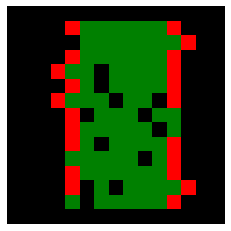

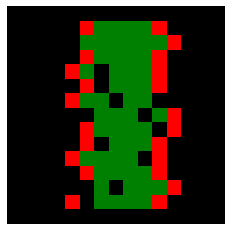

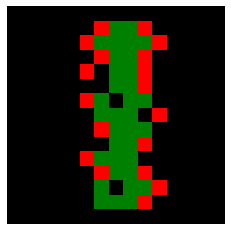

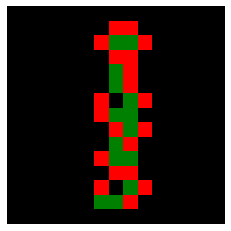

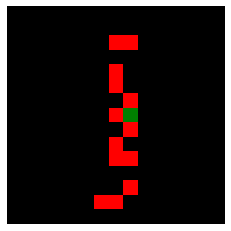

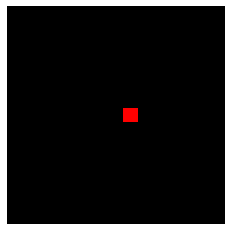

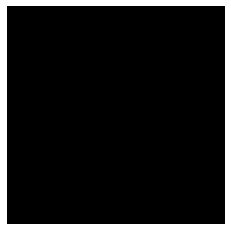

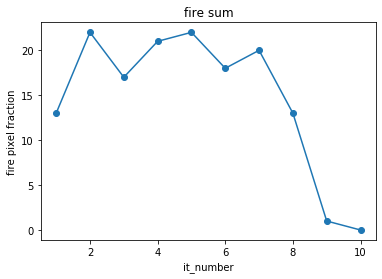

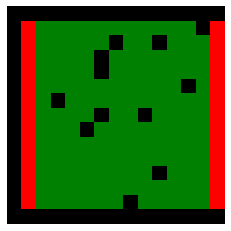

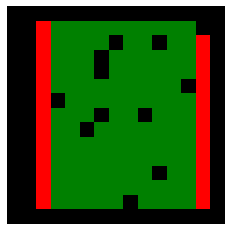

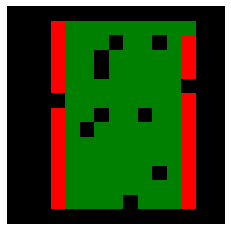

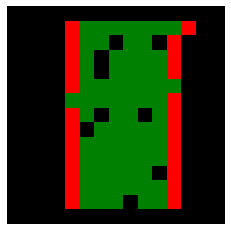

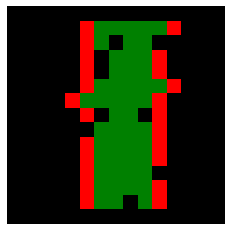

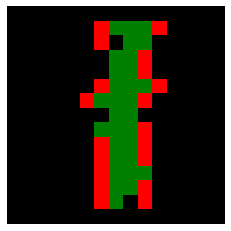

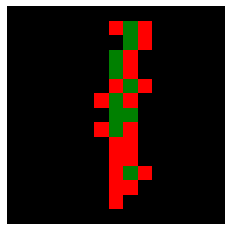

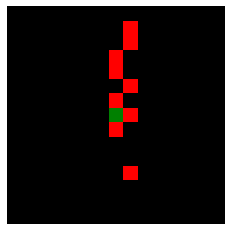

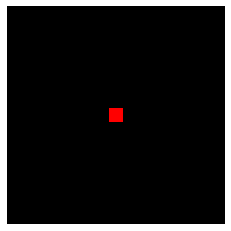

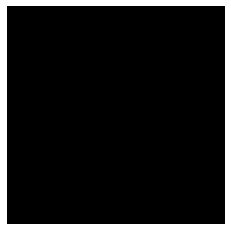

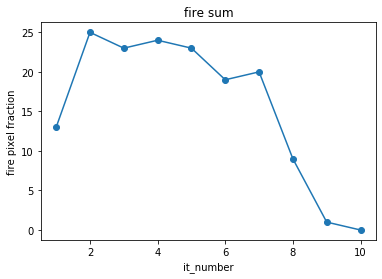

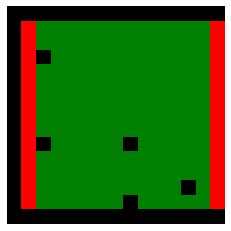

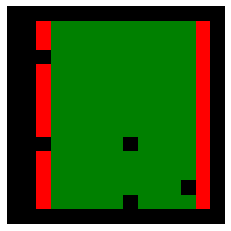

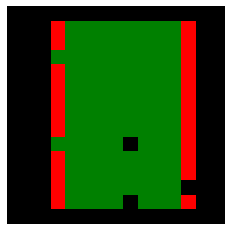

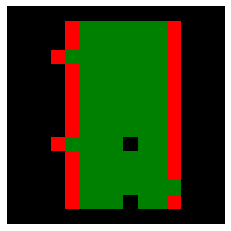

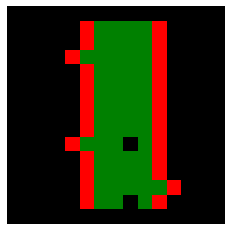

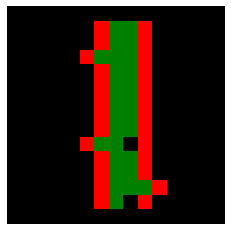

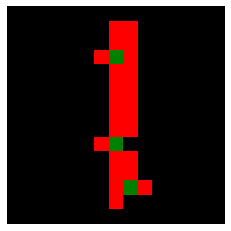

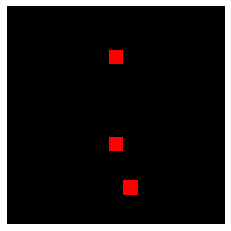

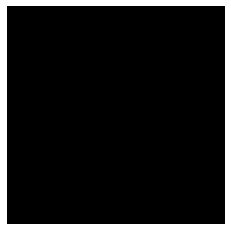

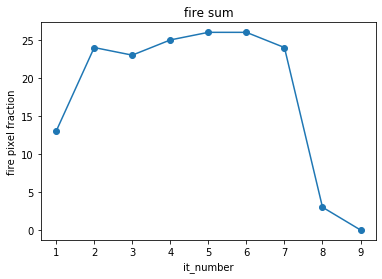

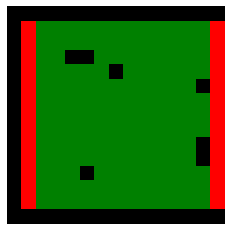

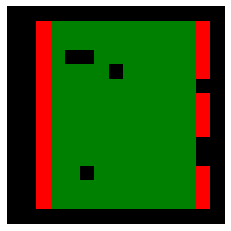

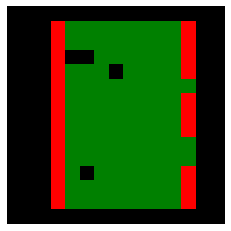

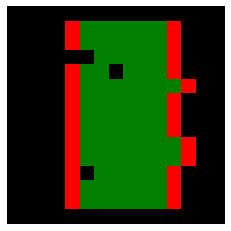

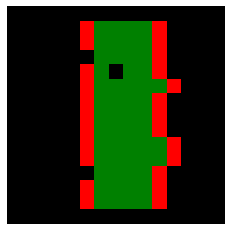

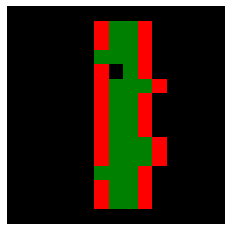

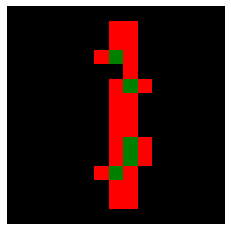

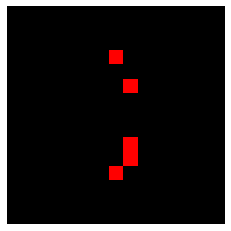

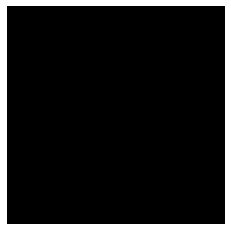

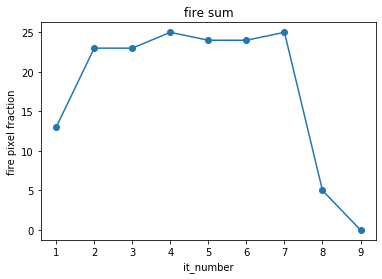

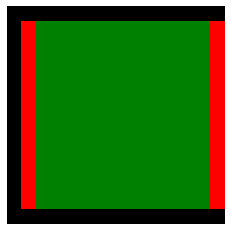

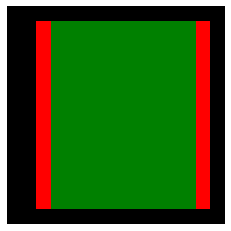

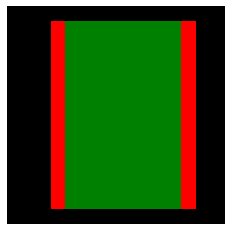

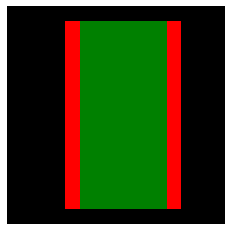

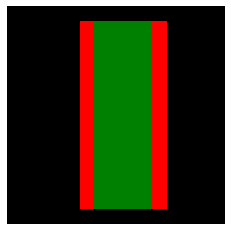

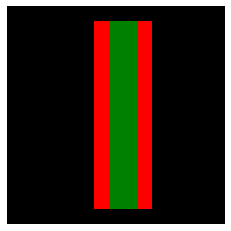

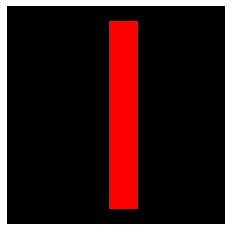

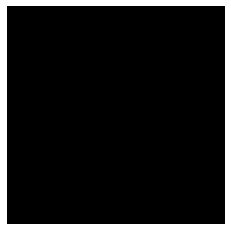

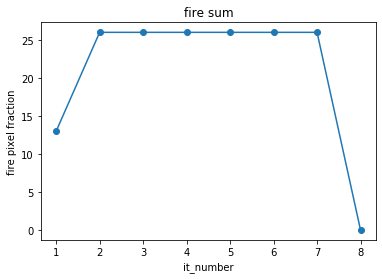

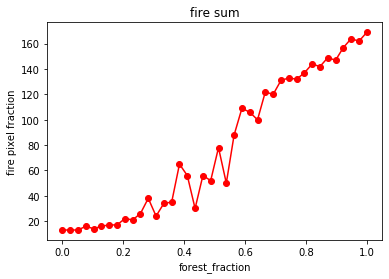

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import *
from matplotlib import colors
#from skimage.measure import label,regionprops
import random
import os
parent_dir = r'D:\00.Software\python demo\分形与混沌'
os.chdir(parent_dir)   

# Create a forest fire animation based on a simple cellular automaton model.
# The maths behind this code is described in the scipython blog article
# at https://scipython.com/blog/the-forest-fire-model/
# Christian Hill, January 2016.

def iterate(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2      
      
    X1 = np.zeros((nx, ny))
    for ix,iy in product(range(1,nx-1), range(1,ny-1)) :
        if X[ix][iy]==TREE:
            X1[ix,iy] = TREE 
        
        for dx,dy in neighbourhood:       
            if X[ix,iy]==TREE and X[ix+dx,iy+dy] == FIRE:
                X1[ix,iy] = FIRE
                break       
    return X1

neighbourhood = ((-1,0),  (0,-1), (0, 1), (1,0))
EMPTY, TREE, FIRE = 0, 1, 2
colors_list = ['black', 'green', 'red']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fire_rate = 1 #没用fire rate
nx, ny = 15, 15
forest_fraction_list = np.linspace(0, 1, 40)
fire_sum_list_2d = []
for  forest_fraction in forest_fraction_list:
    path = os.path.join(parent_dir,str(forest_fraction))
    os.mkdir(path)    
    os.chdir(path)
    fire_sum_list = []
    X  = np.zeros((nx, ny))    
    for i, j in product(range(1,nx-1), range(1,ny-1)):
        X[i][1] = FIRE
        X[i][ny-1] = FIRE
        if np.random.random() < forest_fraction:
            X[i][j] = TREE
        
    
    plt.figure()
    plt.imshow(X,cmap = cmap, norm = norm)
    plt.axis('off')
    plt.savefig('initial, f=%f,ini_forest=%f'%(fire_rate,forest_fraction)+'.png')
    X3 = [[1 if X[i,j]==FIRE else 0 for i in range(1,nx-1)] for j in range(1, ny-1)] 
    fire_sum = np.sum(X3)
    fire_sum_list.append(fire_sum)

    it_number = 0
    while it_number <100 :    
        it_number += 1
        X = iterate(X) 
        X2 = [[1 if X[i,j]==FIRE else 0 for i in range(1,nx-1)] for j in range(1, ny-1)]   
        fire_sum = np.sum(X2)
        fire_sum_list.append(fire_sum)
        plt.figure()
        plt.imshow(X,cmap = cmap, norm = norm)
        plt.axis('off')
        plt.savefig('fire map it=%f, f=%f,ini_forest=%f'%(it_number+1,fire_rate,forest_fraction)+'.png')
        if fire_sum == 0:
            break
    
    fire_sum_list_2d.append(fire_sum_list)    
    plt.figure()
    plt.plot(np.arange(1,len(fire_sum_list)+1), fire_sum_list, '-o')
    plt.title('fire sum')
    plt.xlabel('it_number')
    plt.ylabel('fire pixel fraction')
    plt.savefig('fire_sum it=%f, f=%f,ini_forest=%f'%(it_number+1,fire_rate,forest_fraction)+'.png')  

os.chdir(parent_dir) 
fire_sum_list_2d_ret = [np.sum(fire_sum_list_2d[i]) for i in range(len(fire_sum_list_2d))]
plt.figure()
plt.plot(forest_fraction_list, fire_sum_list_2d_ret, 'r-o')
plt.title('fire sum')
plt.xlabel('forest_fraction')
plt.ylabel('fire pixel fraction')
plt.savefig('fire_sum_2d_p_f_ret it=%f, f=%f,ini_forest=%f'%(it_number+1,fire_rate,forest_fraction)+'.png')   

# 人口模型

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,mu: mu * x * (1-x)

def iteration(mu, x=0.5):
    count = 0  
    x_list = []
    while count < 500:
        count += 1
        x = f(x, mu)
        x_list.append(x)
    return x_list

mu_list = np.linspace(2, 4, 3000)
plt.figure(figsize=(12, 16))
for mu in mu_list:
    x_list = iteration(mu)
    x_list = x_list[100:]
    plt.plot(mu*np.ones(shape=np.shape(x_list)), x_list,'bo', ms=0.05)
    
plt.show()

# 蝴蝶

In [1]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

def fun(y, t, params):
    u, v, w = y
    a, b, c = params
    derivs = [a*(v-u),
               u*(c-w)-v, 
               u*v-b*w]
    return derivs
#参数
a = 10
b = 8/3
c = 28
params = [a, b, c]
#初值
u0, v0, w0 = (-10, -4.45, 35.1)
y0 = [u0, v0, w0]
u1, v1, w1 = (-10+0.01, -4.45+0.01, 35.1+0.01)
y1 = [u1, v1, w1]
#时间
t = np.linspace(0, 10, 1000)
#解方程
result = odeint(fun, y0, t, args=(params,))
result1 = odeint(fun, y1, t, args=(params,))

fig = plt.figure(figsize=(12,16))
ax = fig.gca(projection='3d')
ax.plot(result[:, 0], result[:, 1], result[:, 2],'o-')
ax.plot(result1[:, 0], result1[:, 1], result1[:, 2],'o-')

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

plt.show()